In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Image shape:  (250, 250, 3)
Image shape:  (250, 250, 3)
Image shape:  (250, 250, 3)
Image shape:  (250, 250, 3)
Image shape:  (250, 250, 3)
Image shape:  (250, 250, 3)
Image shape:  (250, 250, 3)


ValueError: num must be an integer with 1 <= num <= 6, not 7

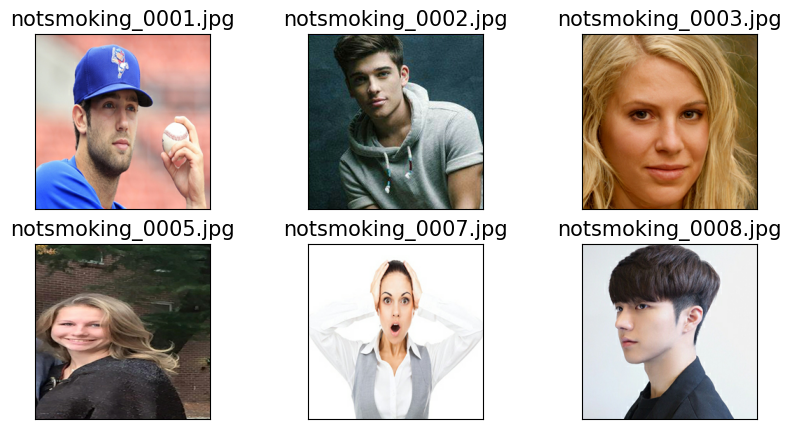

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import os
import numpy as np

imgdir_path = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/smoking/Training/Training')
file_list = sorted([str(path) for path in
imgdir_path.glob('*.jpg')])
fig = plt.figure(figsize=(10, 5))
for i,file in enumerate(file_list):
 img_raw = tf.io.read_file(file)
 img = tf.image.decode_image(img_raw)
 print('Image shape: ', img.shape)
 ax = fig.add_subplot(2, 3, i+1)
 ax.set_xticks([]); ax.set_yticks([])
 ax.imshow(img)
 ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()




In [ ]:
labels = [1 if 'notsmoking' in os.path.basename(file) else 0
 for file in file_list]
ds_files_labels = tf.data.Dataset.from_tensor_slices(
 (file_list, labels))

(70, 110, 3) 1
(70, 110, 3) 1
(70, 110, 3) 1
(70, 110, 3) 1
(70, 110, 3) 1
(70, 110, 3) 1
(70, 110, 3) 1
(70, 110, 3) 1
(70, 110, 3) 1


ValueError: num must be an integer with 1 <= num <= 8, not 9

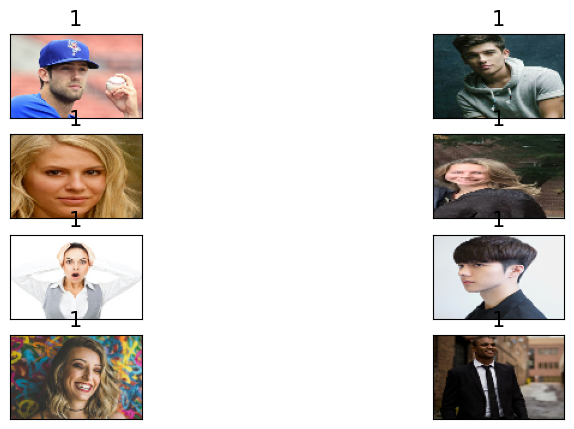

In [ ]:
def load_and_preprocess(path, label):
 image = tf.io.read_file(path)
 image = tf.image.decode_jpeg(image, channels=3)
 image = tf.image.resize(image, [img_height, img_width])
 image /= 255.0
 return image, label
img_width, img_height = 110, 70
ds_images_labels = ds_files_labels.map(load_and_preprocess)
fig = plt.figure(figsize=(10, 5))
for i,example in enumerate(ds_images_labels):
 print(example[0].shape, example[1].numpy())
 ax = fig.add_subplot(4, 2, i+1)
 ax.set_xticks([]); ax.set_yticks([])
 ax.imshow(example[0])
 ax.set_title('{}'.format(example[1].numpy()),
 size=15)

plt.tight_layout()
plt.savefig('catdog.pdf')
plt.show()

In [ ]:
tfds.list_builders()
horses_tf = tfds.builder('horses_or_humans')
horses_tf.download_and_prepare()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteQNHQY0/horses_or_humans-train.tfrecord*..…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteQNHQY0/horses_or_humans-test.tfrecord*...…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


(12, 300, 300, 3) tf.Tensor([0 0 0 0 0 0 0 1 1 1 1 1], shape=(12,), dtype=int32)


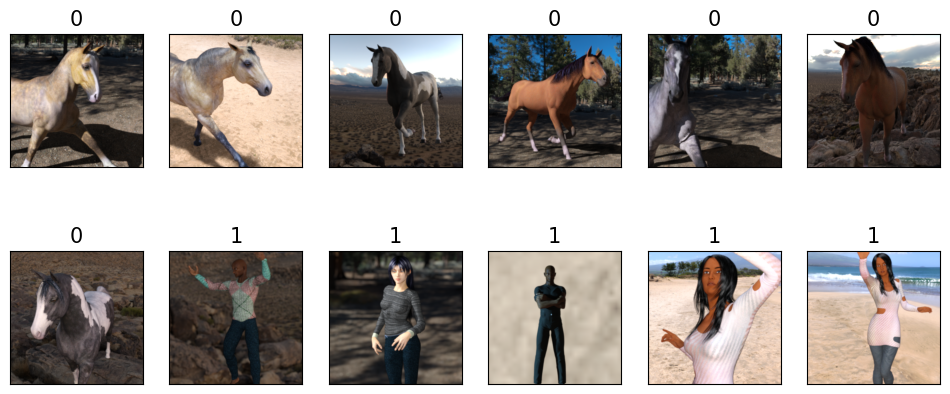

In [ ]:
datasets = horses_tf.as_dataset(shuffle_files=False)

ds_train = datasets['train']
assert isinstance(ds_train, tf.data.Dataset)
ds_train = ds_train.map(lambda item:
 (item['image'], tf.cast(item['label'], tf.int32)))

ds_train = ds_train.batch(12)
images, labels = next(iter(ds_train))
print(images.shape, labels)

fig = plt.figure(figsize=(12, 8))
for i,(image,label) in enumerate(zip(images, labels)):
 ax = fig.add_subplot(3, 6, i+1)
 ax.set_xticks([]); ax.set_yticks([])
 ax.imshow(image, cmap='gray_r')
 ax.set_title('{}'.format(label), size=15)
plt.show()

1. В чем различия между массивами NumPy и tf.Tensor?
Массивы NumPy представляют собой основную структуру данных в библиотеке NumPy, предназначенную для работы с многомерными массивами. Они обладают широким набором функций для работы с данными, включая математические операции, индексацию и срезы. tf.Tensor - это основная структура данных в TensorFlow, представляющая многомерный массив или тензор. Они также обладают множеством функций для выполнения операций над данными, но также интегрированы в граф вычислений TensorFlow.
2. Как ускоряются многие операции для вычислений в TensorFlow?
Многие операции в TensorFlow ускоряются за счет использования оптимизаций, таких как автоматическое дифференцирование, оптимизация графа вычислений, а также использование вычислительных ядер, таких как GPU или TPU.
3. Как TensorFlow решает, использовать ли для операции GPU или CPU?
TensorFlow автоматически решает, использовать ли для операции GPU или CPU, исходя из доступных ресурсов и конфигурации, указанной при создании сессии или выполнении операции.
4. Что описывает граф вычислений в TensorFlow?
Граф вычислений в TensorFlow описывает последовательность операций, которые должны быть выполнены для вычисления конечного результата. Он представляет собой направленный ациклический граф.
5. Из чего состоит граф вычислений в TensorFlow?
Граф вычислений в TensorFlow состоит из узлов (операций) и ребер (данных). Узлы представляют собой операции, такие как математические операции, активации или свертки, а ребра представляют поток данных между этими операциями.
6. Какая основная структура данных, используется в TensorFlow? Каким образом в
ней представляются данные?
Основная структура данных, используемая в TensorFlow, - это tf.Tensor. Данные представляются в нем в виде многомерных массивов (тензоров), которые могут быть константами, переменными или результатами операций. Кроме того, TensorFlow также использует другие структуры данных, такие как tf.Variable для хранения изменяемых значений и tf.placeholder для ввода данных в граф вычислений.